<a href="https://colab.research.google.com/github/vapaul10/DESC624PredictiveAnalytics/blob/Week5/Arashs_DESC_624_5_1_DiscriminantAnalysis_w_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names) #predictors
y = pd.Categorical.from_codes(wine.target, wine.target_names) #target

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y.categories

Index(['class_0', 'class_1', 'class_2'], dtype='object')

In [ ]:
df = X.join(pd.Series(y, name='class'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

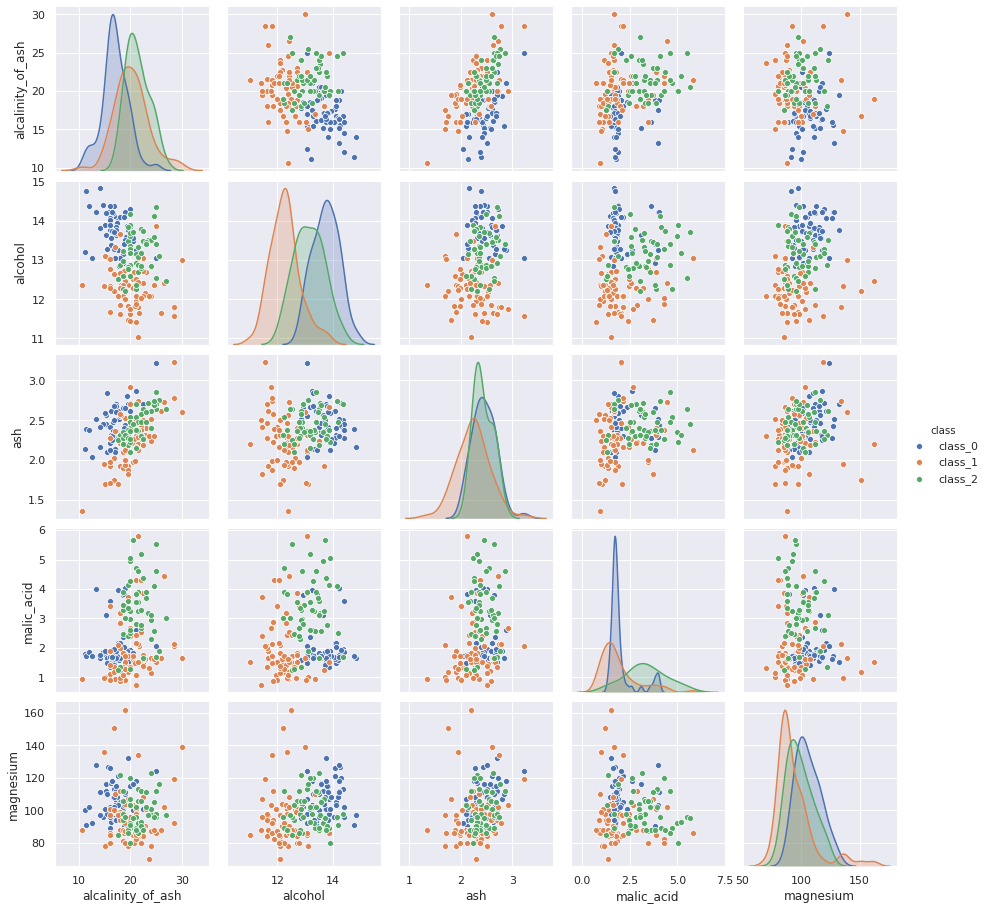

In [ ]:
import seaborn as sns
df2 = df[['alcalinity_of_ash', 'alcohol', 'ash', 'malic_acid', 'magnesium', 'class']]
sns.pairplot(df2, hue = 'class')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

In [ ]:
lda.explained_variance_ratio_

array([0.7022, 0.2978])

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
lda.score(X_test,y_test)

1.0

In [ ]:
from sklearn.metrics import classification_report

#generating a report to extract the measure of interest using built-in sklearn function
report = classification_report(y_test,y_pred,digits=3,output_dict = True)

print("LDA Model:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["class_0"]["precision"]))
print("Specificity = {0:0.3f}".format(report["class_2"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["class_2"]["recall"]))
print("F1-score = {0:0.3f}".format(report["class_2"]["f1-score"]))

LDA Model:
Accuracy = 1.000
Precision = 1.000
Specificity = 1.000
Sensitivity = 1.000
F1-score = 1.000


In [ ]:
report

{'accuracy': 1.0,
 'class_0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 18},
 'class_1': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 17},
 'class_2': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 10},
 'macro avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 45},
 'weighted avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 45}}

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y_train)

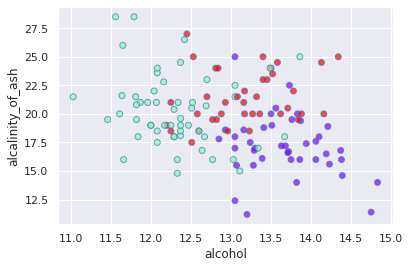

In [ ]:
plt.xlabel('alcohol')
plt.ylabel('alcalinity_of_ash')
plt.scatter(
    X_train['alcohol'],
    X_train['alcalinity_of_ash'],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

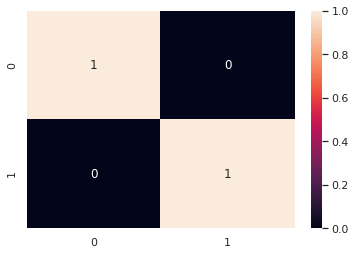

In [ ]:
XX = pd.DataFrame(X_lda)

correlation_matrix = XX.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

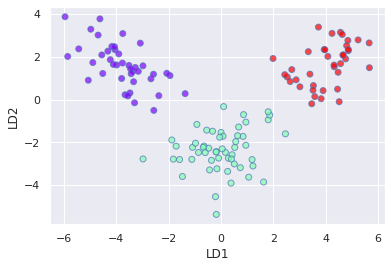

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)